In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime


ticker = 'ICICIBANK.NS'  
df = yf.download(ticker)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-01,25.418180,25.818180,24.818180,25.127272,18.280952,2047540
2002-07-02,25.454544,27.636362,25.236362,26.745455,19.458241,5546354
2002-07-03,26.727272,28.181818,26.645454,28.090908,20.437101,5745267
2002-07-04,28.181818,28.799999,27.036364,27.390909,19.927824,3896601
2002-07-05,27.090908,27.863636,26.945454,27.672728,20.132858,3261038
...,...,...,...,...,...,...
2024-06-19,1127.949951,1165.550049,1126.150024,1144.449951,1144.449951,34309514
2024-06-20,1154.050049,1160.000000,1135.500000,1156.800049,1156.800049,15475933
2024-06-21,1163.550049,1169.900024,1150.650024,1158.650024,1158.650024,69259425


In [29]:
import numpy as np
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(16))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=8, epochs=12)

[array([0.00428747, 0.00566752, 0.00681498, 0.00621799, 0.00645834,
       0.00609394, 0.00596214, 0.00587686, 0.00570629, 0.00570629,
       0.00534964, 0.00515582, 0.00531088, 0.00533414, 0.00542718,
       0.00526436, 0.0053729 , 0.00481468, 0.00452782, 0.00414791])]
[0.004845693481700799]

[array([0.00428747, 0.00566752, 0.00681498, 0.00621799, 0.00645834,
       0.00609394, 0.00596214, 0.00587686, 0.00570629, 0.00570629,
       0.00534964, 0.00515582, 0.00531088, 0.00533414, 0.00542718,
       0.00526436, 0.0053729 , 0.00481468, 0.00452782, 0.00414791]), array([0.00566752, 0.00681498, 0.00621799, 0.00645834, 0.00609394,
       0.00596214, 0.00587686, 0.00570629, 0.00570629, 0.00534964,
       0.00515582, 0.00531088, 0.00533414, 0.00542718, 0.00526436,
       0.0053729 , 0.00481468, 0.00452782, 0.00414791, 0.00484569])]
[0.004845693481700799, 0.00424870337586972]

Epoch 1/12
646/646 [==============================] - 20s 21ms/step - loss: 0.0012
Epoch 2/12
646/646 [================

In [30]:
from  sklearn.metrics import r2_score
test_data = scaled_data[training_data_len - 20: , :]

x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_test,predictions)
r2

9/9 [==============================] - 8s 10ms/step


0.967401293119765

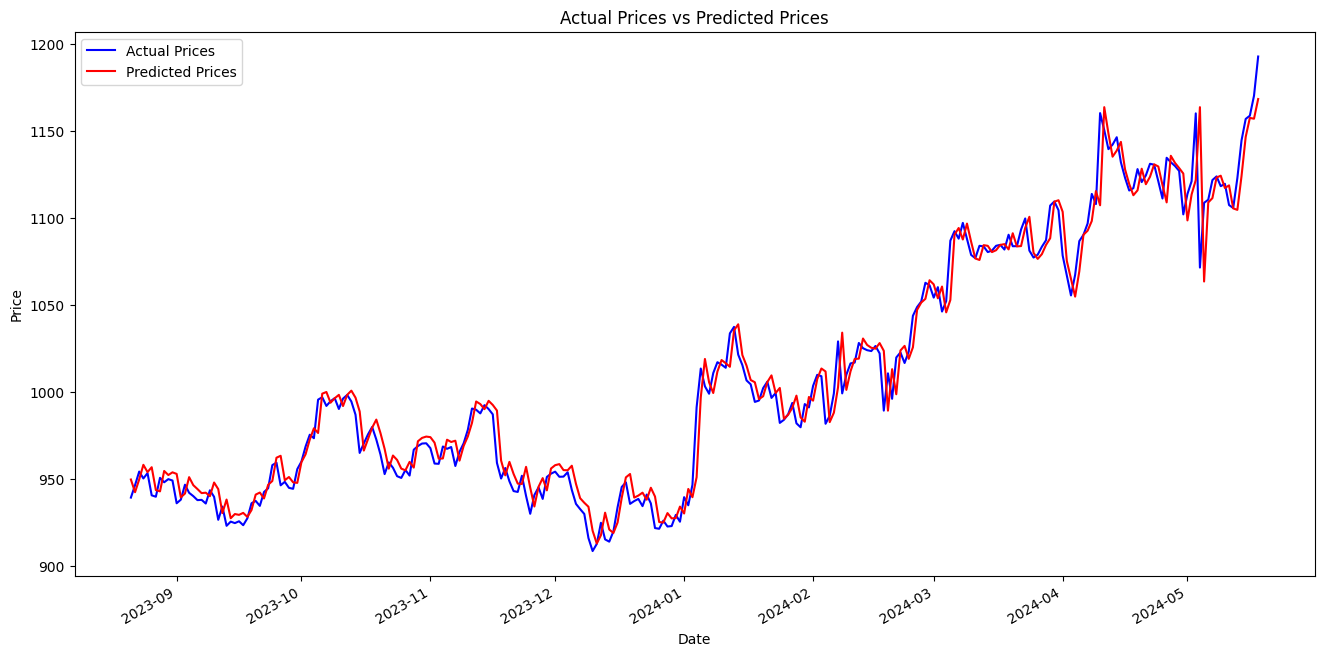

In [31]:
import matplotlib.pyplot as plt
y_test = scaler.inverse_transform(y_test)
predictions = scaler.inverse_transform(predictions)
test_dates = pd.date_range(start='2023-08-21', periods=len(y_test), freq='D')

# Plot the data
plt.figure(figsize=(16, 8))
plt.plot(test_dates, y_test, color='blue', label='Actual Prices')
plt.plot(test_dates, predictions, color='red', label='Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

In [32]:
import joblib


model_file_path = '5.joblib'
scaler_file_path = 'scaler5.joblib'

joblib.dump(model, model_file_path)
joblib.dump(scaler, scaler_file_path)

print(f"Model saved to {model_file_path}")
print(f"Scaler saved to {scaler_file_path}")

Model saved to 5.joblib
Scaler saved to scaler5.joblib
